# Testing the `stellarflow` class

In [86]:
# Imports
import stellarflow as stf
import numpy as np

## Random Stars Initializations

In [87]:
N_init = 1000
X0 = np.random.normal(size=(N_init, 3), loc=0,  scale=10.)
V0 = np.random.normal(size=(N_init, 3), loc=0., scale=0.05)
Q0 = np.concatenate([X0, V0], axis=1)
# print(Q0)
M0 = np.random.chisquare(df=1, size=N_init)

In [88]:
system = stf.System(X0, V0, M0, dt=1.)

In [89]:
system.simulation(3000)

100%|██████████| 3000/3000 [00:16<00:00, 179.85it/s]


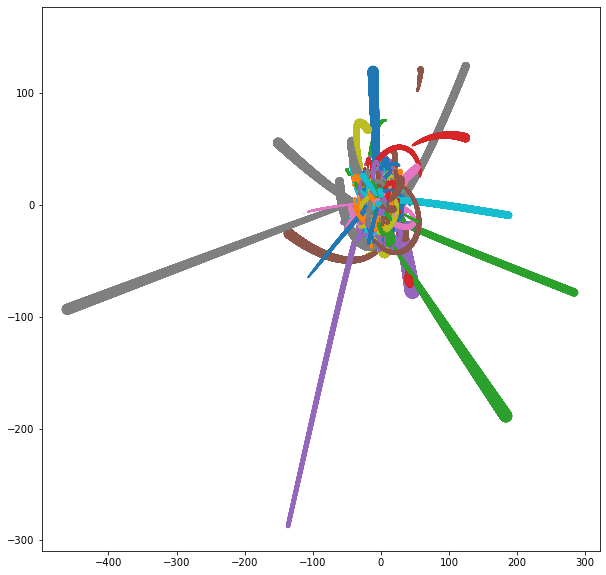

In [98]:
system.plot_history_2d(ZSIZE=True, SUBSET=False, n_sample=200)

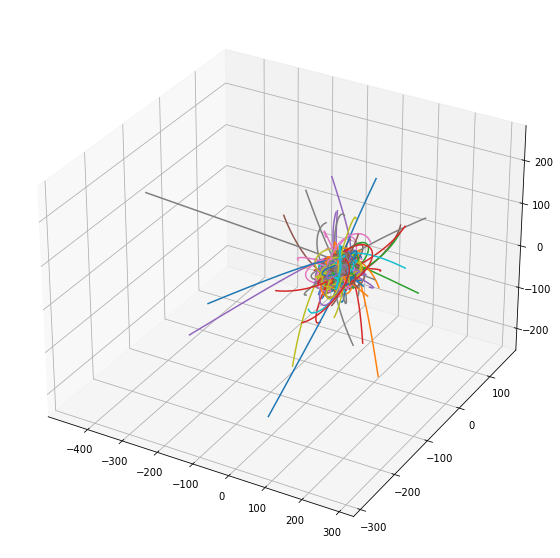

In [91]:
system.plot_history_3d()

## Sun-Earth-Mars

In [93]:
AU, ED = stf.System._AU, stf.System._ED
print(30300./AU*ED)

0.017499714319129007


In [94]:
X = np.array([
    [0., 0.,    0.], # Sun 
    [1., 0.,    0.], # Earth
    [0., 1.524, 0.] # Mars
])

V = np.array([
    [0.,           0., 0.], # Sun 
    [0., 30300./AU*ED, 0.], # Earth
    [27070./AU*ED, 0., 0.] # Mars
])

M = np.array([
    1.,                # Sun
    3.0025e-6,         # Earth
    0.107 * 3.0025e-6 # Mars
])

In [95]:
SEM_system = stf.System(X, V, M)

In [96]:
SEM_system.simulation(1*365)

100%|██████████| 365/365 [00:01<00:00, 227.47it/s]


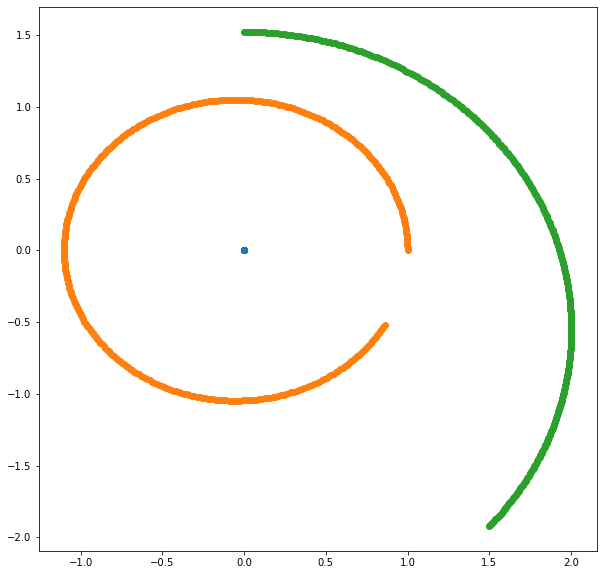

In [97]:
SEM_system.plot_history_2d()